<a href="https://colab.research.google.com/github/IsaMedina07/SenalesYSistemas_2025_1S/blob/main/Ejercicio_en_clase_07_05_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Función:



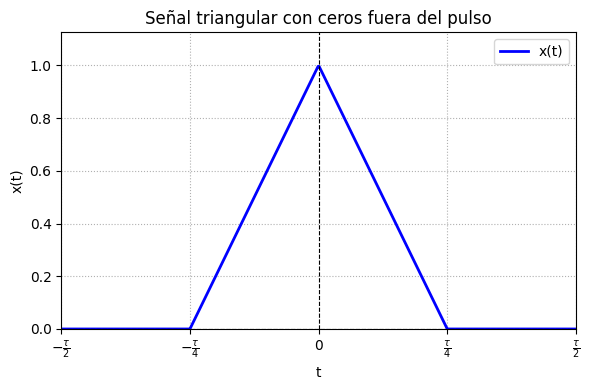

In [123]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la señal
tau = 2 * np.pi     # Período (puedes cambiarlo si quieres)
B = 1               # Valor constante en la señal
N = 500             # Número de puntos para graficar

# Rango de tiempo: entre -tau/2 y tau/2
t = np.linspace(-tau/2, tau/2, N)

# Inicializar señal como ceros
y = np.zeros_like(t)

# Definir por tramos solo en [-tau/4, tau/4]
mask_left = (t >= -tau/4) & (t < 0)
mask_right = (t >= 0) & (t <= tau/4)

y[mask_left] = (4 / tau) * t[mask_left] + B
y[mask_right] = (-4 / tau) * t[mask_right] + B

# Graficar
plt.figure(figsize=(6, 4))
plt.plot(t, y, label="x(t)", color='blue', linewidth=2)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
plt.grid(True, linestyle=':')
plt.title("Señal triangular con ceros fuera del pulso")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.ylim(B - 1, B + 1/8)
plt.xlim(-tau/2, tau/2)
plt.xticks([-tau/2, -tau/4, 0, tau/4, tau/2],
           [r'$-\frac{\tau}{2}$', r'$-\frac{\tau}{4}$', '0', r'$\frac{\tau}{4}$', r'$\frac{\tau}{2}$'])
plt.legend()
plt.tight_layout()
plt.show()

# Al calcular su espectro en serie de Fourier:

In [124]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# ------- DEFINIMOS PARÁMETROS -------
tau = 2 * np.pi     # Período
B = 1               # Valor constante en la señal
N_terms = 10        # Número de armónicos positivos y negativos a graficar
omega_0 = 2 * np.pi / tau  # Frecuencia fundamental

# ------- CALCULAMOS C_n -------
# Generar índices n desde -N_terms hasta N_terms
n_values = np.arange(-N_terms, N_terms + 1)

# Calculamos cn
c_n = np.zeros_like(n_values, dtype=complex)

for i, n in enumerate(n_values):
    if n == 0:
        c_n[i] = B/2 - 1/4  # Término constante
    else:
        cos_term = np.cos(n * np.pi / 2)
        c_n[i] = (2 * B) / (n**2 * np.pi**2) * (1 - cos_term)

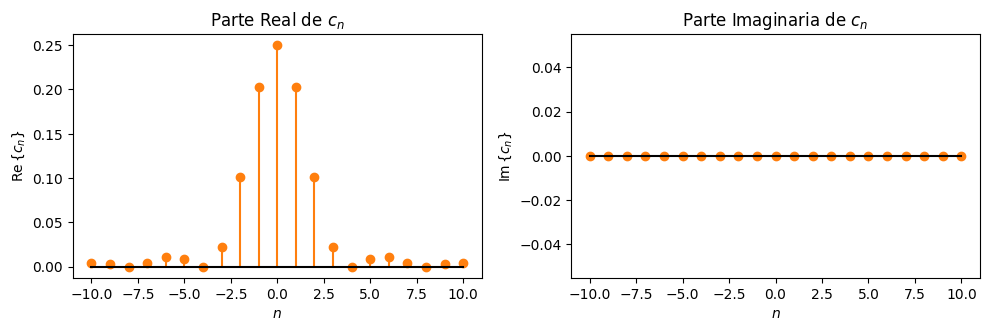

In [125]:
# Parte real e imaginaria
real_part = np.real(c_n)
imag_part = np.imag(c_n)

plt.figure(figsize=(10, 6))

# Parte real
plt.subplot(2, 2, 1)
plt.stem(n_values, real_part, linefmt='C1-', markerfmt='C1o', basefmt='k-')
plt.title("Parte Real de $ c_n $")
plt.xlabel("$ n $")
plt.ylabel("$ \operatorname{Re}\{c_n\} $")

# Parte imaginaria
plt.subplot(2, 2, 2)
plt.stem(n_values, imag_part, linefmt='C1-', markerfmt='C1o', basefmt='k-')
plt.title("Parte Imaginaria de $ c_n $")
plt.xlabel("$ n $")
plt.ylabel("$ \operatorname{Im}\{c_n\} $")

# Ajustar layout
plt.tight_layout()

In [126]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider
from IPython.display import display

# Parámetros
tau = 2 * np.pi     # Período
B = 1               # Valor constante en la señal
omega_0 = 2 * np.pi / tau  # Frecuencia fundamental

# Tiempo para la animación
t = np.linspace(-tau/2, tau/2, 1000)

# Definir la señal original
def x_t(t, tau, B):
    y = np.zeros_like(t)
    mask_left = (t >= -tau/4) & (t < 0)
    mask_right = (t >= 0) & (t <= tau/4)
    y[mask_left] = (4 / tau) * t[mask_left] + B
    y[mask_right] = (-4 / tau) * t[mask_right] + B
    return y

# Función para graficar según el valor de n
def plot_harmonic(n):
    # Calcular la base armónica φ_n(t) = e^{jnω₀t}
    phi_n = np.exp(1j * n * omega_0 * t)

    # Parte real e imaginaria
    real_part = np.real(phi_n)
    imag_part = np.imag(phi_n)

    # Graficar
    plt.figure(figsize=(8, 4))
    plt.plot(t, real_part, label=r"$\operatorname{Re}\{\phi_n(t)\}$", color='blue')
    plt.plot(t, imag_part, label=r"$\operatorname{Im}\{\phi_n(t)\}$", color='orange')
    plt.plot(t, x_t(t, tau, B), label=r"$x(t)$", color='red', linewidth=4)

    # Configurar etiquetas y leyenda
    plt.title(f"Base armónica n = {n}")
    plt.xlabel("t")
    plt.ylabel(r"$\phi_n(t)$")
    plt.legend(loc='lower left')
    plt.grid(True, linestyle=':')
    plt.xlim(-tau/2, tau/2)
    plt.ylim(-1.5, 1.5)
    plt.show()

# Crear el control deslizante
n_slider = IntSlider(value=0, min=-20, max=20, step=1, description='n:')

# Enlazar el control deslizante con la función de graficado
interact(plot_harmonic, n=n_slider);

interactive(children=(IntSlider(value=0, description='n:', max=20, min=-20), Output()), _dom_classes=('widget-…

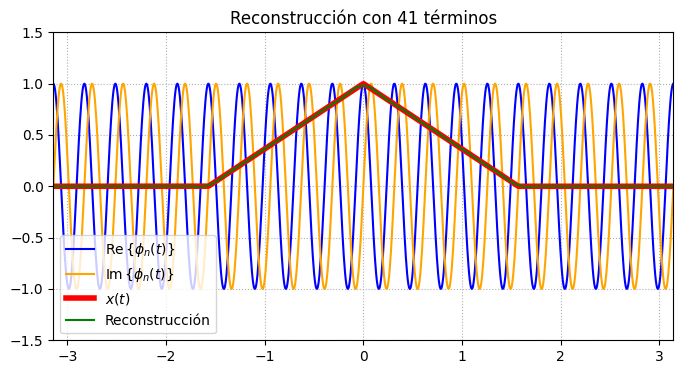

In [127]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Parámetros
tau = 2 * np.pi     # Período
B = 1               # Valor constante en la señal
N_terms = 20        # Número de armónicos positivos y negativos a graficar
omega_0 = 2 * np.pi / tau  # Frecuencia fundamental

# Tiempo para la animación
t = np.linspace(-tau/2, tau/2, 1000)

# Definir la señal original
def x_t(t, tau, B):
    y = np.zeros_like(t)
    mask_left = (t >= -tau/4) & (t < 0)
    mask_right = (t >= 0) & (t <= tau/4)
    y[mask_left] = (4 / tau) * t[mask_left] + B
    y[mask_right] = (-4 / tau) * t[mask_right] + B
    return y

# Calcular los coeficientes complejos c_n
n_values = np.arange(-N_terms, N_terms + 1)
c_n = np.zeros_like(n_values, dtype=complex)

for i, n in enumerate(n_values):
    if n == 0:
        c_n[i] = B/2 - 1/4  # Término constante
    else:
        cos_term = np.cos(n * np.pi / 2)
        c_n[i] = (2 * B) / (n**2 * np.pi**2) * (1 - cos_term)

# Función para calcular la señal reconstruida
def reconstruct_signal(N):
    reconstructed_signal = np.zeros_like(t, dtype=complex)
    for n in range(-N, N + 1):
        reconstructed_signal += c_n[n + N_terms] * np.exp(1j * n * omega_0 * t)
    return np.real(reconstructed_signal)

# Configurar figura y eje
fig, ax = plt.subplots(figsize=(8, 4))
ax.set_xlim(-tau/2, tau/2)
ax.set_ylim(-1.5, 1.5)
ax.grid(True, linestyle=':')
line_re, = ax.plot([], [], label=r"$\operatorname{Re}\{\phi_n(t)\}$", color='blue')
line_im, = ax.plot([], [], label=r"$\operatorname{Im}\{\phi_n(t)\}$", color='orange')
line_x, = ax.plot(t, x_t(t, tau, B), label=r"$x(t)$", color='red', linewidth=4)
line_recon, = ax.plot([], [], label="Reconstrucción", color='green')

# Función de actualización para la animación
def update(frame):
    N = frame
    phi_n = np.exp(1j * N * omega_0 * t)

    # Parte real e imaginaria del término armónico actual
    real_part = np.real(phi_n)
    imag_part = np.imag(phi_n)

    # Actualizar gráficos
    line_re.set_data(t, real_part)
    line_im.set_data(t, imag_part)

    # Reconstruir la señal con términos desde -N hasta N
    reconstructed_signal = reconstruct_signal(N)
    line_recon.set_data(t, reconstructed_signal)

    # Actualizar título
    ax.set_title(f"Reconstrucción con {2*N+1} términos")
    return line_re, line_im, line_recon

# Crear animación
anim = FuncAnimation(fig, update, frames=np.arange(0, N_terms + 1), interval=200, blit=True)
plt.legend(loc='lower left')
HTML(anim.to_jshtml())